<a href="https://colab.research.google.com/github/elangbijak4/AI-General/blob/main/Demo_Multi_Hidden_Layer_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Epoch 1/50
235/235 [==============================] - 7s 23ms/step - loss: 0.2245 - val_loss: 0.1462
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1311 - val_loss: 0.1183
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1142 - val_loss: 0.1083
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1065 - val_loss: 0.1023
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1018 - val_loss: 0.0987
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0990 - val_loss: 0.0966
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0970 - val_loss: 0.0948
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0952 - val_loss: 0.0931
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0937 - val_loss: 0.0917
Epoch 10/50
235/235 [==============================] - 5s 19ms/step - loss: 0.0924 - val_lo

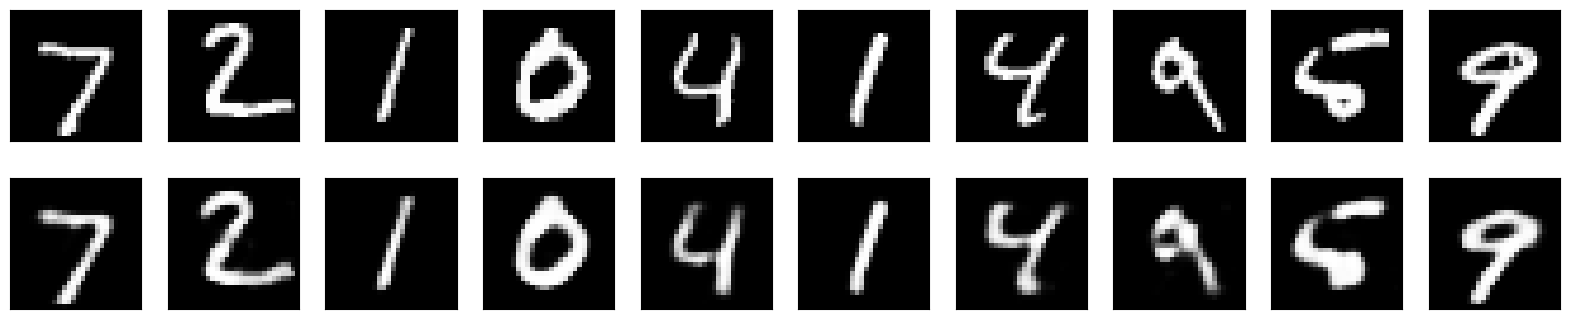

In [3]:

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define encoding dimension
encoding_dim = 32  # Dimensionality of the latent space
hidden_dim = 128   # Dimensionality of the additional hidden layers

# Input placeholder
input_img = Input(shape=(784,))

# Encoder layers
hidden_1 = Dense(hidden_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_1)

# Decoder layers
hidden_2 = Dense(hidden_dim, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_hidden = autoencoder.layers[-2]
decoder_output = autoencoder.layers[-1]

# Decoder model
decoder = Model(encoded_input, decoder_output(decoder_hidden(encoded_input)))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()